# Notebook: Data Load and Analysis

In this notebook, we illustrate how to use pandas and Jupyter notebook to **analyze a dataset**. It will cover how to do basic analysis of a dataset using **pandas functions**, **sklearn** and how to transform a dataset by **mapping functions**.

## Contents
The structure of the notebook is as follows:
* Import a Dataset Into Jupyter
* Basic Analysis of Dataset
* Mapping Functions to Transform Data
* Histograms
* Kernel Density Estimation in Practice


## Sources

<!--BOOK_INFORMATION-->
*This notebook has been modified by Aythami Morales from:

[Data Analysis with Python and pandas using Jupyter Notebook](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html) by Amy Ghate; [scikitlearn Density Estimation ](http://scikit-learn.org/stable/modules/density.html) by scikit-learn developers (BSD License)

Hacer tutoriales de scikitlearn


## Installing Python and Jupyter

You can run Jupyter notebook in the cloud using a service like https://try.jupyter.org/ or install and run it locally. To install it locally follow the instructions here: http://jupyter.readthedocs.org/en/latest/install.html. You will need to have or install Python 3.3 or greater or Python 2.7.


### Import a Dataset Into Jupyter

Before we import our sample dataset into the notebook we will import the pandas library. pandas is an open source Python library that provides "high-performance, easy-to-use data structures and data analysis tools." - http://pandas.pydata.org/

In [8]:
import pandas as pd
print(pd.__version__)

0.25.2


Next, we will read the following dataset from Efron et al, 2004 [http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html]. diabetes.csv

Pandas provides several methods for reading data in differet formats. Here we'll read it in as csv but you can read in json and Excel files as well. 



The data is returned as a "DataFrame" which is a 2 dimensional spreadsheet-like datastructure with columns of different types. pandas has two main data structures - the DataFrame and Series. A Series is a one-dimensional array that can hold any value type - This is not necessarily the case but a DataFrame column may be treated as a Series.

Displayed below are the first 5 rows of the DataFrame we imported (to see the last n rows use .tail(n)).

In [9]:
#read the csv file
df = pd.read_csv('diabetes.csv',';') # la ; es la delimitacion

In [10]:
#display the first 5 rows
df.head(5)
df.tail(5) # last 5 rows

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
436,60,2,28.2,112.00,185,113.8,42.0,4.00,49.836,93,178
437,47,2,24.9,75.00,225,166.0,42.0,5.00,44.427,102,104
438,60,2,24.9,99.67,162,106.6,43.0,3.77,41.271,95,132
439,36,1,30.0,95.00,201,125.2,42.0,4.79,51.299,85,220
440,36,1,19.6,71.00,250,133.2,97.0,3.00,45.951,92,57


### Basic Analysis of Dataset

pandas has several methods that allow you to quickly analyze a dataset and get an idea of the type and amount of data you are dealing with along with some important statistics. 

La primera fila del csv es considera los títulos

In [11]:
# returns the row and column count of a dataset
df.shape

(441, 11)

In [12]:
# returns statistics about the numerical columns in a dataset 
df.describe() # para cada columna

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,48.494331,1.467120,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408,41.320320,91.269841,152.136054
std,13.114378,0.499484,4.414694,13.843672,34.613383,30.429116,12.936663,1.291911,14.247448,11.507595,77.180542
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.000000,1.000000,23.200000,84.000000,165.000000,96.200000,41.000000,3.000000,40.775000,83.000000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.000000
75%,59.000000,2.000000,29.200000,105.000000,210.000000,134.600000,58.000000,5.000000,49.345000,98.000000,212.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


You can drop feature columns to remove unwanted values

In [13]:
# in this example we remove BP column
df.drop("BP", axis=1).describe(include="all") # axis = 1 es para decirle que es columna. x = 0 es fila Include all es lo mismo que no poner nada

,AGE,SEX,BMI,S1,S2,S3,S4,S5,S6,Y
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,48.494331,1.467120,26.362812,189.213152,115.489569,49.815193,4.070408,41.320320,91.269841,152.136054
std,13.114378,0.499484,4.414694,34.613383,30.429116,12.936663,1.291911,14.247448,11.507595,77.180542
min,19.000000,1.000000,18.000000,97.000000,41.600000,22.000000,2.000000,3.912000,58.000000,25.000000
25%,38.000000,1.000000,23.200000,165.000000,96.200000,41.000000,3.000000,40.775000,83.000000,87.000000
50%,50.000000,1.000000,25.700000,186.000000,113.000000,48.000000,4.000000,44.659000,91.000000,140.000000
75%,59.000000,2.000000,29.200000,210.000000,134.600000,58.000000,5.000000,49.345000,98.000000,212.000000
max,79.000000,2.000000,42.200000,301.000000,242.400000,99.000000,9.090000,61.048000,124.000000,346.000000


In [14]:
# returns the data type of each column
df.dtypes
df.AGE.mean() # haz la media de todas esas filas de la columna AGE
df.AGE.mean(axis = 0)
df.AGE.mean # no actúa y solo hace la media de cada fila por separado

<bound method Series.mean of 0      48
1      72
2      24
3      50
4      23
       ..
436    60
437    47
438    60
439    36
440    36
Name: AGE, Length: 441, dtype: int64>

Here are some additional methods that can give you statistics of a DataFrame or particular column in a DataFrame.
- .mean(axis=0 [will give you the calculated value per column]) - returns the statistical mean 
- .median(axis=0 [will give you the calculated value per column]) - returns the statistical median 
- .mode(axis=0 [will give you the calculated value per column]) - returns the statistical mode
- .count() - gives number of total values in column
- .unique() - returns array of all unique values in that column
- .value_counts() - returns object containing counts of unique values

In [15]:
df.AGE.mean()

48.49433106575964

In [16]:
df.BMI.count()

441

In [17]:
df.SEX.value_counts() # Class 1 y class 2

1    235
2    206
Name: SEX, dtype: int64

### Mapping Functions to Transform Data

Often times we need to apply a function to a column in a dataset to transform it. pandas makes it easy to do with the .apply() method. In this example, we will map the values in the "SEX" column to either a "MALE" or "FEMALE" depending on the value. We will append this information to the DataFrame in a new column.

Queremos cambiar 1 y 2 por male and female

Try to define your functions in separete modules. In this example we will import our own module my_module.py located in the folder my_modules.

In [18]:
#add your module folder to the python path
import sys
sys.path.append('./my_modules') # incluye en el path de Jupyter ese archivo

#my_module is an example of python module created to include your own functions
import my_module

In [19]:
# the function mapSEX is located in the file my_module.py. See the file for details
df['sex_mapped_value'] = df.SEX.apply(my_module.mapSEX) # mapSex es la 
df.sex_mapped_value.head(5) ## creas una nueva columna con los sexos, pero no los sustituyes

0      MALE
1    FEMALE
2      MALE
3      MALE
4      MALE
Name: sex_mapped_value, dtype: object

In [20]:
# count based on the new labels
df.sex_mapped_value.value_counts()

df.dtypes
df # aparece una nueva columna

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,sex_mapped_value
0,48,1,21.6,87.00,183,103.2,70.0,3.00,38.918,69,75,MALE
1,72,2,30.5,93.00,156,93.6,41.0,4.00,46.728,85,141,FEMALE
2,24,1,25.3,84.00,198,131.4,40.0,5.00,48.903,89,206,MALE
3,50,1,23.0,101.00,192,125.4,52.0,4.00,42.905,80,135,MALE
4,23,1,22.6,89.00,139,64.8,61.0,2.00,41.897,68,97,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
436,60,2,28.2,112.00,185,113.8,42.0,4.00,49.836,93,178,FEMALE
437,47,2,24.9,75.00,225,166.0,42.0,5.00,44.427,102,104,FEMALE
438,60,2,24.9,99.67,162,106.6,43.0,3.77,41.271,95,132,FEMALE
439,36,1,30.0,95.00,201,125.2,42.0,4.79,51.299,85,220,MALE


### Histograms

A density estimator is an algorithm which seeks to model the probability distribution that generated a dataset. For one dimensional data, you are probably already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.

The standard count-based histogram can be created with the ``plt.hist()`` function.
By specifying the ``density`` parameter of the histogram, we end up with a normalized histogram where the height of the bins does not reflect counts, but instead reflects probability density:

Para mostrar la distribución de los datos usamos hist. 
Density indica que la suma de todos los bins es igual a 1. Te muestra su proporción ynno el valor absoluto. 

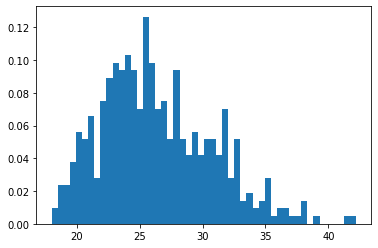

In [21]:
# output of plotting commands is displayed inline within frontends
%matplotlib inline 

# plt is a function with basic plots
import matplotlib.pyplot as plt

# plot the standard count-based histogram
hist = plt.hist(df.BMI, bins=50, density=True) # le paso la x, luego los bins, el density = TRUE 
#hist = plt.hist(df.BMI, bins=50)

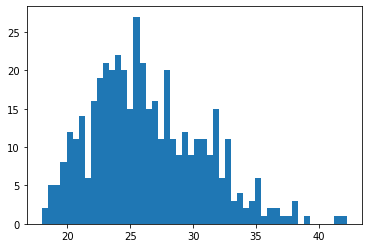

In [22]:
hist = plt.hist(df.BMI, bins=50) # mira el eje de la Y, las unidades en que se expresa

Notice that for equal binning, this normalization simply changes the scale on the y-axis, leaving the relative heights essentially the same as in a histogram built from counts. This normalization is chosen so that the total area under the histogram is equal to 1.

One of the issues with using a histogram as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features.

<br>
<font color='red'>TASK 1: TEST DIFFERENT BINS VALUES. REPRESENT AND ANALYZE THE RESULTS</font> 


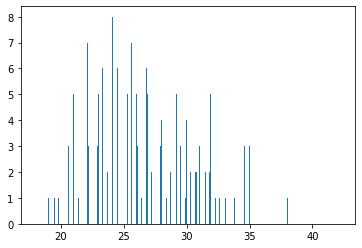

In [26]:
# add your code here

hist = plt.hist(df.BMI, bins=1000)

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
<br>
<br>
<br>
<br>

Con el kernel nos dice como sería la distribución para una cantidad de datos infinitos. El histograma limita a una cantidad de datos. El kernel nos permite suavizar el histograma. 

### Kernel Density Estimation in Practice

The free parameters of kernel density estimation are the *kernel*, which specifies the shape of the distribution placed at each point, and the *kernel bandwidth*, which controls the size of the kernel at each point.
In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports one of six kernels, which you can read about in Scikit-Learn's [Density Estimation documentation](http://scikit-learn.org/stable/modules/density.html).

Let's first show a simple example of replicating the above plot using the Scikit-Learn ``KernelDensity`` estimator. The selection of bandwidth is an important piece of KDE. For the same input data, different bandwidths can produce very different results:

(-0.02, 0.1)

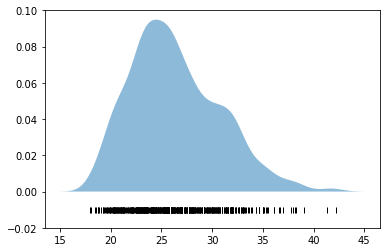

In [27]:
from sklearn.neighbors import KernelDensity
import numpy as np

# in this example we will estimate the kernel density of the BMI feature
x=df.BMI
# sampling with 100 points from 15 to 45
x_d = np.linspace(15, 45, 100) # entre 15 y 45 me vas a tomar muestras entre esos dos valores (los que estaba en el histograma) y sacaremos 100 muestras

# instantiate the KDE model, parameters bandwidth and kernel determine the estimation
## ESTIMADOR !!!!
kde = KernelDensity(bandwidth=1.0, kernel='gaussian') # Hay diferentes tipos de kernels mira el enlace


# fit the KDE model to the data, BMI feature in this example
kde.fit(x[:, None]) # Como hemos sacado solo BMI solo tenemos una columna y muchas filas. Le pides que coja todas las filas

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

# plot the envelope of the KDE model
plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # quitas el log con el exponencial. Aqui ploteas lo azul 
#plot the data used to fit the model, the data is plotted in possition -0.01
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # pones la linea negra, que es lo que teníamos real
plt.ylim(-0.02, 0.10) # vemos que la estimacin del kernel es correcta o similar a la que teníamos 




<br>
<font color='red'>TASK 2: TEST DIFFERENT BANDWIDTH VALUES AND KERNEL FUNCTIONS. REPRESENT AND ANALYZE THE RESULTS</font> 

(-0.02, 0.1)

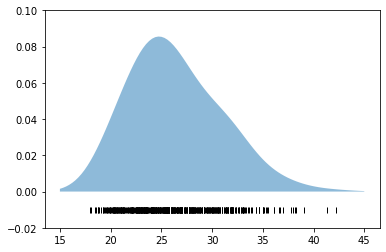

In [28]:
# Add your code

kde = KernelDensity(bandwidth=2.0, kernel='gaussian')

# fit the KDE model to the data, BMI feature in this example
kde.fit(x[:, None]) # Como hemos sacado solo BMI solo tenemos una columna y muchas filas. Le pides que coja todas las filas

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

# plot the envelope of the KDE model
plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # quitas el log con el exponencial. Aqui ploteas lo azul 
#plot the data used to fit the model, the data is plotted in possition -0.01
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # pones la linea negra, que es lo que teníamos real
plt.ylim(-0.02, 0.10) # vemos que la estimacin del kernel es correcta o similar a la que teníamos

(-0.02, 0.1)

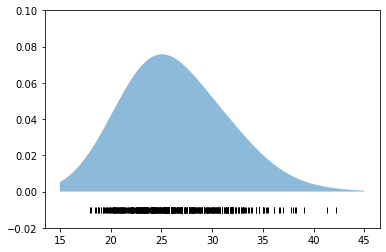

In [29]:
# Add your code

kde = KernelDensity(bandwidth=3.0, kernel='gaussian')

# fit the KDE model to the data, BMI feature in this example
kde.fit(x[:, None]) # Como hemos sacado solo BMI solo tenemos una columna y muchas filas. Le pides que coja todas las filas

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

# plot the envelope of the KDE model
plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # quitas el log con el exponencial. Aqui ploteas lo azul 
#plot the data used to fit the model, the data is plotted in possition -0.01
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # pones la linea negra, que es lo que teníamos real
plt.ylim(-0.02, 0.10) # vemos que la estimacin del kernel es correcta o similar a la que teníamos

(-0.02, 0.1)

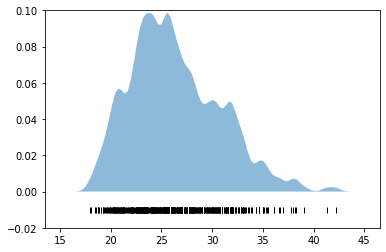

In [31]:
# Add your code

kde = KernelDensity(bandwidth=0.5, kernel='gaussian')

# fit the KDE model to the data, BMI feature in this example
kde.fit(x[:, None]) # Como hemos sacado solo BMI solo tenemos una columna y muchas filas. Le pides que coja todas las filas

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

# plot the envelope of the KDE model
plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # quitas el log con el exponencial. Aqui ploteas lo azul 
#plot the data used to fit the model, the data is plotted in possition -0.01
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # pones la linea negra, que es lo que teníamos real
plt.ylim(-0.02, 0.10) # vemos que la estimacin del kernel es correcta o similar a la que teníamos

<br>
<font color='red'>ADD YOUR ANALYSIS</font> 
<br>
<br>
<br>
<br>
<br>

https://mathisonian.github.io/kde/

Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data.

This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram. It can also be used to generate points that look like they came from a certain dataset - this behavior can power simple simulations, where simulated objects are modeled off of real data.

I hope this article provides some intuition for how KDE works. 

The KDE algorithm takes a parameter, bandwidth, that affects how “smooth” the resulting curve is. 

Changing the bandwidth changes the shape of the kernel: a lower bandwidth means only points very close to the current position are given any weight. 

### Resumen --> + Bandwidht = + puntos vecinos se consideran en el kernel = + suave la distribución estimada


## Tutorial scikitlearn

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
y = [0, 1]  # classes of each sample
clf.fit(X, y)

clf.predict(X)  # predict classes of the training data

clf.predict([[4, 5, 6], [14, 15, 16]])  # predict classes of new data

/home/alvaro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 1])

In [6]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
print(rng)
X = rng.rand(10, 2000)
print(X)
X = np.array(X, dtype='float32')
print(X.dtype)


transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

RandomState(MT19937)
[[0.5488135  0.71518937 0.60276338 ... 0.48010781 0.64386404 0.50177313]
 [0.81151847 0.47608399 0.52315599 ... 0.83000295 0.93280618 0.30833843]
 [0.29264205 0.56651827 0.13741443 ... 0.69652287 0.48369661 0.33955073]
 ...
 [0.32059506 0.24986687 0.03107279 ... 0.38938909 0.93272    0.33276632]
 [0.39553738 0.84401749 0.15044175 ... 0.53561083 0.35458205 0.93578099]
 [0.8140271  0.85133715 0.43113659 ... 0.44645576 0.36012661 0.62588665]]
float32


dtype('float64')